In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df=data[['Age','Education','TotalWorkingYears','Attrition']]

In [5]:
df

,Age,Education,TotalWorkingYears,Attrition
0,41,2,8,Yes
1,49,1,10,No
2,37,2,7,Yes
3,33,4,8,No
4,27,1,6,No
...,...,...,...,...
1465,36,2,17,No
1466,39,1,9,No
1467,27,3,6,No
1468,49,3,17,No


In [6]:
df.head()

,Age,Education,TotalWorkingYears,Attrition
0,41,2,8,Yes
1,49,1,10,No
2,37,2,7,Yes
3,33,4,8,No
4,27,1,6,No


<Axes: xlabel='Attrition', ylabel='count'>

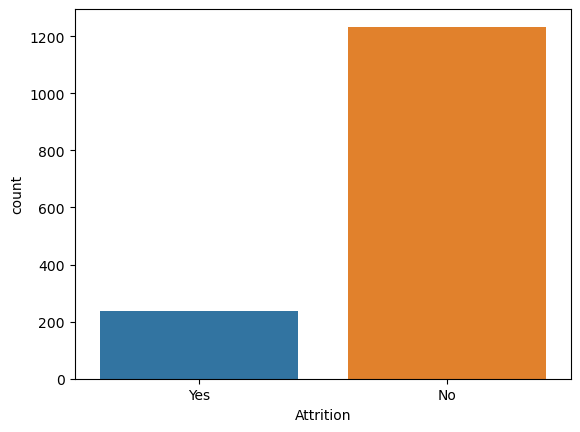

In [9]:
sns.countplot(x=df['Attrition'])

In [10]:
df.head()

,Age,Education,TotalWorkingYears,Attrition
0,41,2,8,Yes
1,49,1,10,No
2,37,2,7,Yes
3,33,4,8,No
4,27,1,6,No


# Convert Attrition feature - String to number with Encoding Techniques

In [11]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
df['Attrition']=en.fit_transform(df['Attrition'])

C:\Users\shabaz\AppData\Local\Temp\ipykernel_12032\244156667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition']=en.fit_transform(df['Attrition'])


In [12]:
df.head()

,Age,Education,TotalWorkingYears,Attrition
0,41,2,8,1
1,49,1,10,0
2,37,2,7,1
3,33,4,8,0
4,27,1,6,0


# Build K-Means model

In [13]:
from sklearn.cluster import KMeans
clust=KMeans(n_clusters=3)
clust.fit(df)

C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
clust.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [15]:
#Performance Measure

from sklearn.metrics import silhouette_score
labels=clust.labels_
print(labels,len(labels))
print('Silhouette_Score:\t', silhouette_score(df,labels))

[2 2 2 ... 0 1 0] 1470
Silhouette_Score:	 0.3982328426151156


In [16]:
clust.inertia_

61877.394395939766

In [17]:
clust.n_clusters

3

# Lbow curve to find optimum k value

C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\clust

Text(0, 0.5, 'Error')

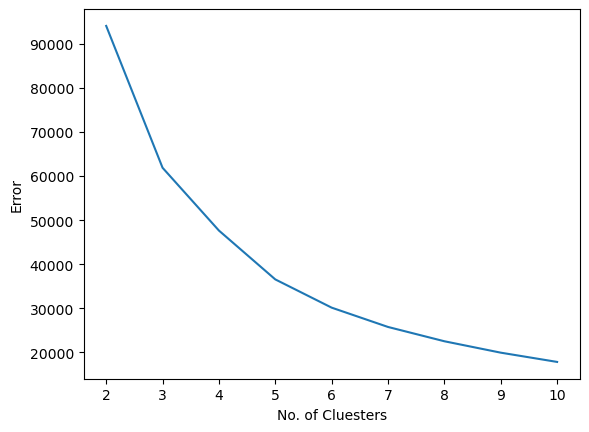

In [18]:
k=list(range(2,11))
y=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=1,init='k-means++')
    km.fit(df)
    labels=km.labels_
    y.append(km.inertia_)
    
plt.plot(k,y)
plt.xlabel('No. of Cluesters')
plt.ylabel('Error')

C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shabaz\AppData\Local\Temp\ipykernel_12032\2290396198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=cluster.fit_predict(df)


Text(0, 0.5, 'size')

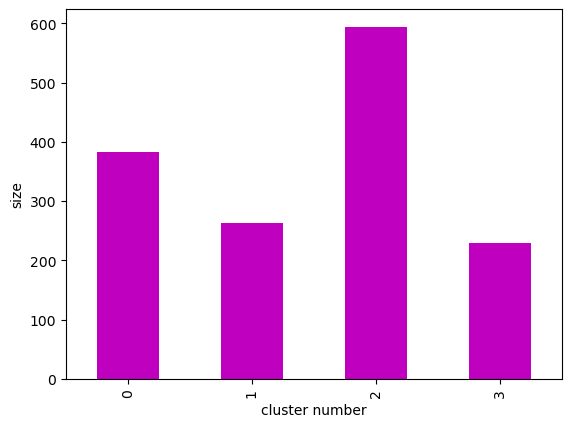

In [19]:
# Elbow point where slope of line is lower=4,5

cluster=KMeans(n_clusters=4,random_state=2)
df['cluster']=cluster.fit_predict(df)
df.cluster.value_counts().sort_index().plot(kind='bar',color='m')
plt.xlabel('cluster number')
plt.ylabel('size')

C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\clust

[0.49182223162629907, 0.39711299672474637, 0.3855875799633028, 0.38922273942333335, 0.3759215893868919, 0.37381987484346874, 0.36855942458462476, 0.3559874736619592, 0.35841369638941056]


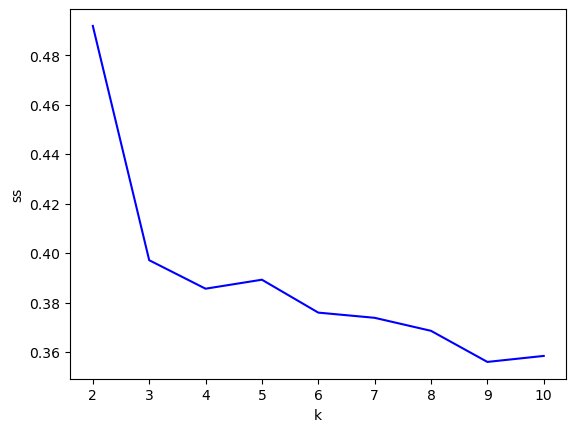

In [20]:
k=list(range(2,11))
ys=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=2)
    km.fit(df)
    labels=km.labels_
    ys.append(silhouette_score(df,labels))
    
plt.plot(k,ys,color='b')
plt.xlabel('k')
plt.ylabel('ss')
print(ys)

In [21]:
df.head()

,Age,Education,TotalWorkingYears,Attrition,cluster
0,41,2,8,1,3
1,49,1,10,0,3
2,37,2,7,1,2
3,33,4,8,0,2
4,27,1,6,0,0


In [22]:
dff=df.drop(['Attrition','cluster'],axis=1)

In [23]:
dff

,Age,Education,TotalWorkingYears
0,41,2,8
1,49,1,10
2,37,2,7
3,33,4,8
4,27,1,6
...,...,...,...
1465,36,2,17
1466,39,1,9
1467,27,3,6
1468,49,3,17


C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\clust

[0.5018693648890541, 0.3985452130031417, 0.3760497385317214, 0.38592734906435316, 0.37749453248974907, 0.37211485292604946, 0.3724606512663489, 0.3654377743161512, 0.35765069061268284]


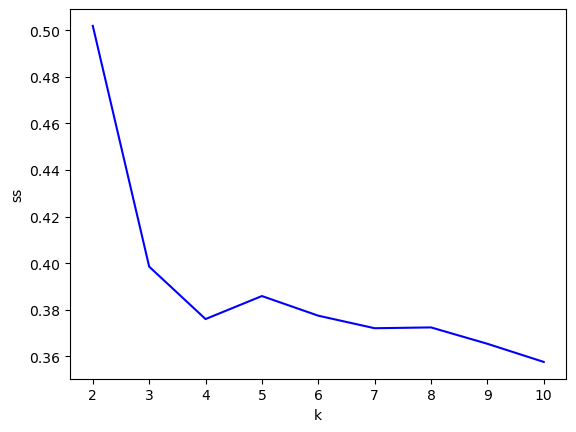

In [24]:
k=list(range(2,11))
ys=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=2)
    km.fit(dff)
    labels=km.labels_
    ys.append(silhouette_score(dff,labels))
    
plt.plot(k,ys,color='b')
plt.xlabel('k')
plt.ylabel('ss')
print(ys)

C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shabaz\AppData\Local\Temp\ipykernel_12032\2488474793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=cluster.fit_predict(df)


Text(0, 0.5, 'size')

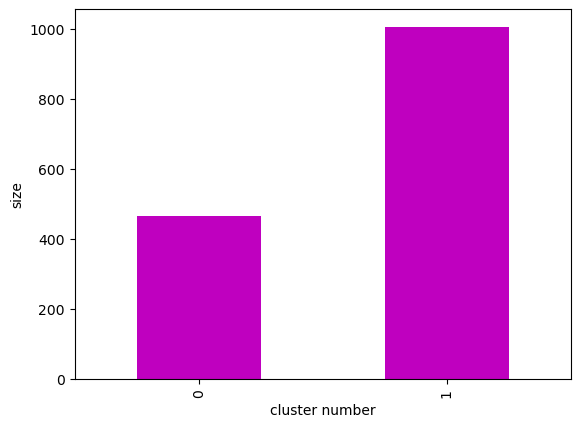

In [26]:
cluster=KMeans(n_clusters=2,random_state=2)
df['cluster']=cluster.fit_predict(df)
df.cluster.value_counts().sort_index().plot(kind='bar',color='m')
plt.xlabel('cluster number')
plt.ylabel('size')